# Project: Wrangling and Analyze Data

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
import requests
from tqdm.notebook import tqdm_notebook

## Data Gathering

1. Use pandas to read the csv file in the local machine

In [2]:
archive_df = pd.read_csv('twitter-archive-enhanced.csv')
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
# write the request's response to a file
open('image_predictions.tsv', 'wb').write(r.content)

335079

In [4]:
# read the download tsv file to a dataframe
img_df = pd.read_csv('image_predictions.tsv', sep = '\t')
img_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API

In [5]:
# the keys needed to use tweepy is stored in Twitter_API_Keys.ipynb. Hence, the need for running the notebook internally
%run Twitter_API_Keys.ipynb

In [6]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [7]:
import time
start = time.time()
tweet_ids = []
retweet_count = []
like_count = []
errors_count = 0
# tdqm_notebook() is used for checking the progress of the for loop
for i, tweet_id in tqdm_notebook(enumerate(archive_df.tweet_id)):
    try:
        status = api.get_status(tweet_id, tweet_mode = 'extended')
        tweet_ids.append(tweet_id)
        retweet_count.append(status.retweet_count)
        like_count.append(status.favorite_count)
    except:
        errors_count += 1
# time taken to run the API
time_taken = time.time() - start
print(f'{time_taken / 60} minutes was used for runnning the API')

0it [00:00, ?it/s]

27.332217184702554 minutes was used for runnning the API


In [8]:
# to assure that all tweet_ids were processed
(len(tweet_ids) + errors_count) == archive_df.tweet_id.count()

True

In [9]:
# converting the dictionaries to a dataframe
tweepy_df = pd.DataFrame({'tweet_id': tweet_ids, 'retweet_count': retweet_count, 'like_count': like_count})
tweepy_df

,tweet_id,retweet_count,like_count
0,892420643555336193,6971,33700
1,892177421306343426,5274,29230
2,891815181378084864,3464,21975
3,891689557279858688,7191,36793
4,891327558926688256,7719,35188
...,...,...,...
1767,668986018524233728,139,478
1768,668981893510119424,258,478
1769,668979806671884288,291,701
1770,668975677807423489,495,1151


In [10]:
tweepy_df.to_csv('tweepy_df.csv', index = False)

## Assessing Data

In [11]:
# checking a sample of the archive data
archive_df.sample(7)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
548,805487436403003392,NaN,NaN,2016-12-04 19:02:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sansa and Gary. They run along the fence ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/805487436...,12,10,Sansa,None,None,None,None
2082,670815497391357952,NaN,NaN,2015-11-29 04:04:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sage. He likes to burn shit. 10/10 htt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670815497...,10,10,Sage,None,None,None,None
658,791672322847637504,NaN,NaN,2016-10-27 16:06:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When she says you're a good boy and you know y...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/791672322...,13,10,None,None,None,None,None
1748,679062614270468097,NaN,NaN,2015-12-21 22:15:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chompsky. He lives up to his name. 11/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679062614...,11,10,Chompsky,None,None,None,None
1970,673295268553605120,NaN,NaN,2015-12-06 00:17:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Eve. She's a raging alcoholic 8/10 (would...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673295268...,8,10,Eve,None,None,pupper,None
2011,672245253877968896,NaN,NaN,2015-12-03 02:45:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Snickers. He's adorable. Also comes in t-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672245253...,12,10,Snickers,None,None,None,None
143,864197398364647424,NaN,NaN,2017-05-15 19:14:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Paisley. She ate a flower just to prov...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/864197398...,13,10,Paisley,None,None,None,None


In [12]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
# checking the distribution of the dataframe
archive_df.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,2356.0,7.427716e+17,6.856705e+16,6.660209e+17,6.783989e+17,7.196279e+17,7.993373e+17,8.924206e+17
in_reply_to_status_id,78.0,7.455079e+17,7.582492e+16,6.658147e+17,6.757419e+17,7.038708e+17,8.257804e+17,8.862664e+17
in_reply_to_user_id,78.0,2.014171e+16,1.252797e+17,1.185634e+07,3.086374e+08,4.196984e+09,4.196984e+09,8.405479e+17
retweeted_status_id,181.0,7.720400e+17,6.236928e+16,6.661041e+17,7.186315e+17,7.804657e+17,8.203146e+17,8.874740e+17
retweeted_status_user_id,181.0,1.241698e+16,9.599254e+16,7.832140e+05,4.196984e+09,4.196984e+09,4.196984e+09,7.874618e+17
rating_numerator,2356.0,1.312649e+01,4.587665e+01,0.000000e+00,1.000000e+01,1.100000e+01,1.200000e+01,1.776000e+03
rating_denominator,2356.0,1.045543e+01,6.745237e+00,0.000000e+00,1.000000e+01,1.000000e+01,1.000000e+01,1.700000e+02


In [14]:
archive_df.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [15]:
# checking ratings whose denominator is not 10 and numerator is greater than 15
archive_df[(archive_df.rating_denominator != 10) | (archive_df.rating_numerator > 15)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None


In [16]:
# checking a sample of the dataframe
img_df.sample(7)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
753,688179443353796608,https://pbs.twimg.com/media/CYznjAcUEAQ5Zq7.jpg,1,sorrel,0.811520,False,horse_cart,0.024820,False,Arabian_camel,0.015155,False
2044,886258384151887873,https://pbs.twimg.com/media/DEyfTG4UMAE4aE9.jpg,1,pug,0.943575,True,shower_cap,0.025286,False,Siamese_cat,0.002849,False
1978,870656317836468226,https://pbs.twimg.com/media/DBUxSSTXsAA-Jn1.jpg,4,Pembroke,0.945495,True,Cardigan,0.045875,True,beagle,0.004329,True
1686,814638523311648768,https://pbs.twimg.com/media/C04taUjWIAA6Mo4.jpg,2,golden_retriever,0.650814,True,kuvasz,0.053281,True,cocker_spaniel,0.035440,True
1402,768970937022709760,https://pbs.twimg.com/ext_tw_video_thumb/76896...,1,Pomeranian,0.182358,True,golden_retriever,0.110658,True,mousetrap,0.086399,False
1502,784517518371221505,https://pbs.twimg.com/media/CuMqhGrXYAQwRqU.jpg,2,malamute,0.757764,True,Eskimo_dog,0.151248,True,Siberian_husky,0.084840,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False


In [17]:
img_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
img_df.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,2075.0,7.384514e+17,6.785203e+16,6.660209e+17,6.764835e+17,7.119988e+17,7.932034e+17,8.924206e+17
img_num,2075.0,1.203855e+00,5.618750e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
p1_conf,2075.0,5.945483e-01,2.711735e-01,4.433340e-02,3.644120e-01,5.882300e-01,8.438550e-01,1.000000e+00
p2_conf,2075.0,1.345886e-01,1.006657e-01,1.011300e-08,5.388625e-02,1.181810e-01,1.955655e-01,4.880140e-01
p3_conf,2075.0,6.032417e-02,5.090593e-02,1.740170e-10,1.622240e-02,4.944380e-02,9.180755e-02,2.734190e-01


In [19]:
tweepy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1772 entries, 0 to 1771
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   tweet_id       1772 non-null   int64
 1   retweet_count  1772 non-null   int64
 2   like_count     1772 non-null   int64
dtypes: int64(3)
memory usage: 41.7 KB


### Quality issues

1. Unambiguous tweet source

2. Rating denominator not constant and outliers in rating numerators

3. Replace 'a' in dog name with NaN

4. Reply and retweet data part of the archive_data table

5. Drop `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp`

6. Timestamp does not have correct data types

7. None Values in dog name

### Tidiness issues
1. Timestamp to 2 separate columns - date and time

2. Dog stage in wide data format

2. Dog breed in multiple columns

3. Related datasets

## Cleaning Data

In [20]:
# Make copies of original pieces of data
archive_df_new = archive_df.copy()
img_df_new = img_df.copy()
tweepy_df_new = tweepy_df.copy()

### Issue #1:

#### Define: extract tweet source

#### Code

In [21]:
archive_df_new.source = archive_df_new.source.str.split('>').str[-2].str[:-3]

#### Test

In [22]:
archive_df_new.source.sample(10)

776      Twitter for iPhone
592      Twitter for iPhone
706      Twitter for iPhone
2007     Twitter for iPhone
1525     Twitter for iPhone
2193     Twitter for iPhone
2235     Twitter for iPhone
1146    Vine - Make a Scene
1914     Twitter for iPhone
2094     Twitter for iPhone
Name: source, dtype: object

### Issue #2:

#### Define: remove denominator ratings that are not equal to 10 and numerator ratings that are greater than 15

<em>N.B: 15 was used as the benchmark for numerator ratings because it's a bit above the 75th percentile.</em>

#### Code

In [23]:
archive_df_new = archive_df_new[~((archive_df_new.rating_denominator != 10) | (archive_df_new.rating_numerator > 15))]

#### Test

In [24]:
archive_df_new[(archive_df_new.rating_denominator != 10) | (archive_df_new.rating_numerator > 15)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #3

#### Define: Replace 'a' in dog name with NaN

#### Code

In [25]:
# 'a' in the dog name should be an error during extraction
archive_df_new['name'].replace('a', np.nan, inplace = True)

#### Test

In [26]:
archive_df_new[archive_df_new.name == 'a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #4

#### Define: remove retweets and replies from datasets 

#### Code

In [27]:
archive_df_new.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [28]:
# in_reply_to_status_id denotes the tweet is a reply while retweeted_status_id denotes that it's a retweet
archive_df_new = archive_df_new[~(archive_df_new.in_reply_to_status_id.notnull() | archive_df_new.retweeted_status_id.notnull())]

#### Test

In [29]:
# checks if there is any non-null value in the dataframe
archive_df_new[archive_df_new.in_reply_to_status_id.notnull() | archive_df_new.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #5

#### Define: Remove retweet and reply tweet columns

#### Code

In [30]:
archive_df_new.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)

#### Test

In [31]:
archive_df_new.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Issue #6

#### Define: Change `timestamp` to a datetime data type

#### Code

In [32]:
archive_df_new.timestamp = pd.to_datetime(archive_df_new.timestamp)

#### Test

In [33]:
archive_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2075 non-null   int64              
 1   timestamp           2075 non-null   datetime64[ns, UTC]
 2   source              2075 non-null   object             
 3   text                2075 non-null   object             
 4   expanded_urls       2072 non-null   object             
 5   rating_numerator    2075 non-null   int64              
 6   rating_denominator  2075 non-null   int64              
 7   name                2021 non-null   object             
 8   doggo               2075 non-null   object             
 9   floofer             2075 non-null   object             
 10  pupper              2075 non-null   object             
 11  puppo               2075 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

### Issue #7

#### Define: Replace None values with `np.nan` in `archive_df_new.name`

#### Code

In [34]:
archive_df_new.name.replace('None', np.nan, inplace = True)

#### Test

In [35]:
archive_df_new[archive_df_new.name == 'None']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #8

#### Define: Create new columns - date and time 

#### Code

In [36]:
archive_df_new['date'] = archive_df_new['timestamp'].dt.date
archive_df_new['time'] = archive_df_new['timestamp'].dt.time
archive_df_new.drop('timestamp', axis =1, inplace = True)

#### Test

In [37]:
archive_df_new.sample(5)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
1995,672594978741354496,Twitter for iPhone,Meet Scott. Just trying to catch his train to ...,https://twitter.com/dog_rates/status/672594978...,9,10,Scott,None,None,pupper,None,2015-12-04,01:55:13
787,774639387460112384,Twitter for iPhone,This is Sprinkles. He's trapped in light jail....,https://twitter.com/dog_rates/status/774639387...,10,10,Sprinkles,None,None,None,None,2016-09-10,16:03:16
1441,696877980375769088,Twitter for iPhone,This is Misty. She's in a predicament. Not sur...,https://twitter.com/dog_rates/status/696877980...,9,10,Misty,None,None,pupper,None,2016-02-09,02:07:12
58,880935762899988482,Twitter for iPhone,This is Louis. He's crossing. It's a big deal....,https://twitter.com/dog_rates/status/880935762...,13,10,Louis,None,None,None,None,2017-06-30,23:47:07
395,825535076884762624,Twitter for iPhone,Here's a very loving and accepting puppo. Appe...,https://twitter.com/dog_rates/status/825535076...,14,10,NaN,None,None,None,puppo,2017-01-29,02:44:34


### Issue #9

#### Define: Extract dog stage

#### Code

In [38]:
# replacing None valuetypes with 'nil' for easy referencing
archive_df_new.doggo.replace('None', 'nil', inplace = True)
archive_df_new.floofer.replace('None', 'nil', inplace = True)
archive_df_new.pupper.replace('None', 'nil', inplace = True)
archive_df_new.puppo.replace('None', 'nil', inplace = True)

In [39]:
dog_stage =[]
doggo_list = archive_df_new.doggo.tolist()
floofer_list = archive_df_new.floofer.tolist()
pupper_list = archive_df_new.pupper.tolist()
puppo_list = archive_df_new.puppo.tolist()
# loops through the four dog stage columns and append the value gotten else it returns NaN
for i, stage in enumerate(doggo_list):
    if stage != 'nil':
        dog_stage.append(doggo_list[i])
    elif floofer_list[i] != 'nil':
        dog_stage.append(floofer_list[i])
    elif pupper_list[i] != 'nil':
        dog_stage.append(pupper_list[i])
    elif pupper_list[i] != 'nil':
        dog_stage.append(puppo_list[i])
    else:
        dog_stage.append(np.nan)

In [40]:
# creating a new column - dog_stage
archive_df_new['dog_stage'] = dog_stage
# dropping the four columns
archive_df_new.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True)

#### Test

In [41]:
archive_df_new.sample(5)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,date,time,dog_stage
1244,711743778164514816,Twitter for iPhone,Meet Roosevelt. He's calculating the best case...,https://twitter.com/dog_rates/status/711743778...,11,10,Roosevelt,2016-03-21,02:38:34,NaN
1513,691096613310316544,Twitter for iPhone,Here we see one dog giving a puptalk to anothe...,https://twitter.com/dog_rates/status/691096613...,11,10,NaN,2016-01-24,03:14:07,NaN
781,775729183532220416,Twitter for iPhone,This girl straight up rejected a guy because h...,https://twitter.com/dog_rates/status/775729183...,13,10,NaN,2016-09-13,16:13:44,NaN
1702,680934982542561280,Twitter for iPhone,Say hello to Sadie. She's a Tortellini Sidewin...,https://twitter.com/dog_rates/status/680934982...,10,10,Sadie,2015-12-27,02:15:25,NaN
2034,671743150407421952,Twitter for iPhone,This is a Tuscaloosa Alcatraz named Jacob (Yac...,https://twitter.com/dog_rates/status/671743150...,11,10,NaN,2015-12-01,17:30:22,NaN


### Issue #10

#### Define: Extract dog breed 

In [42]:
img_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
812,692530551048294401,https://pbs.twimg.com/media/CZxc3G7WEAAM4Mv.jpg,1,Siberian_husky,0.486428,True,Eskimo_dog,0.448518,True,white_wolf,0.041506,False
1963,867051520902168576,https://pbs.twimg.com/media/DAhiwb0XcAA8x5Q.jpg,1,Samoyed,0.471403,True,Pekinese,0.302219,True,Pomeranian,0.156606,True
900,699801817392291840,https://pbs.twimg.com/media/CbYyCMcWIAAHHjF.jpg,2,golden_retriever,0.808978,True,Irish_setter,0.042428,True,Labrador_retriever,0.023536,True
868,697596423848730625,https://pbs.twimg.com/media/Ca5cPrJXIAImHtD.jpg,1,Shetland_sheepdog,0.621668,True,collie,0.366578,True,Pembroke,0.007698,True


In [43]:
dog_breed =[]
p1_list = img_df_new.p1.tolist()
p2_list = img_df_new.p2.tolist()
p3_list = img_df_new.p3.tolist()

for i, breed in enumerate(img_df_new.p1_dog):
    if breed == True:
        dog_breed.append(p1_list[i])
    elif img_df_new.p2_dog[i] == True:
        dog_breed.append(p2_list[i])
    elif img_df_new.p3_dog[i] == True:
        dog_breed.append(p3_list[i])
    else:
        dog_breed.append(np.nan)

Confidence level of prediction ranks from p1_conf to p3_conf i.e. p1_conf >> p2_conf > p3_conf. </br>The code iterates over the 3 predictions, chooses the first if it's a dog breed because of it's high confidence level, otherwise  the second prediction, otherwise the third prediction. And it returns NaN if none pf the predictions is a dog breed.

In [44]:
# create new column from the list in the previous code cell
img_df_new['dog_breed'] = dog_breed

In [45]:
# create a list of columns to keep
keep = ['tweet_id', 'jpg_url', 'img_num', 'dog_breed']
# modify the dataframe to the columns needed
img_df_new = img_df_new[keep]

#### Test

In [46]:
img_df_new.head(5)

,tweet_id,jpg_url,img_num,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher


### Issue #11

#### Define: Related datasets

#### Code

In [47]:
# merging img_df_new and tweepy_df_new together
merge_1 = tweepy_df_new.merge(archive_df_new, on ='tweet_id', how = 'right')
merge_2 = merge_1.merge(img_df_new, on = 'tweet_id')

#### Test

In [48]:
merge_2.head()

,tweet_id,retweet_count,like_count,source,text,expanded_urls,rating_numerator,rating_denominator,name,date,time,dog_stage,jpg_url,img_num,dog_breed
0,892420643555336193,6971.0,33700.0,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,2017-08-01,16:23:56,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN
1,892177421306343426,5274.0,29230.0,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,2017-08-01,00:17:27,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua
2,891815181378084864,3464.0,21975.0,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,2017-07-31,00:18:03,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua
3,891689557279858688,7191.0,36793.0,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,2017-07-30,15:58:51,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever
4,891327558926688256,7719.0,35188.0,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,2017-07-29,16:00:24,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset


## Re-assessing Data

In [49]:
merge_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1949 entries, 0 to 1948
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1949 non-null   int64  
 1   retweet_count       1452 non-null   float64
 2   like_count          1452 non-null   float64
 3   source              1949 non-null   object 
 4   text                1949 non-null   object 
 5   expanded_urls       1949 non-null   object 
 6   rating_numerator    1949 non-null   int64  
 7   rating_denominator  1949 non-null   int64  
 8   name                1384 non-null   object 
 9   date                1949 non-null   object 
 10  time                1949 non-null   object 
 11  dog_stage           280 non-null    object 
 12  jpg_url             1949 non-null   object 
 13  img_num             1949 non-null   int64  
 14  dog_breed           1647 non-null   object 
dtypes: float64(2), int64(4), object(9)
memory usage: 243.6+

### Quality

12. tweet_id, like_count and retweet_count has wrong data types

## Re-cleaning Data

### Issue #12

#### Define: Convert tweet_id to string; like_count and retweet_count to integer

#### Code

In [50]:
# change tweet_id to string
merge_2.tweet_id = merge_2.tweet_id.astype('str')
int_list = ['like_count', 'retweet_count']
# loops through the int_list
for col in int_list:
    # fillna with 0 inorder to be able to convert it integer
    merge_2[col].fillna(0, inplace = True)
    # convert the columns to integer
    merge_2[col] = merge_2[col].astype('int')

#### Test

In [51]:
merge_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1949 entries, 0 to 1948
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1949 non-null   object
 1   retweet_count       1949 non-null   int32 
 2   like_count          1949 non-null   int32 
 3   source              1949 non-null   object
 4   text                1949 non-null   object
 5   expanded_urls       1949 non-null   object
 6   rating_numerator    1949 non-null   int64 
 7   rating_denominator  1949 non-null   int64 
 8   name                1384 non-null   object
 9   date                1949 non-null   object
 10  time                1949 non-null   object
 11  dog_stage           280 non-null    object
 12  jpg_url             1949 non-null   object
 13  img_num             1949 non-null   int64 
 14  dog_breed           1647 non-null   object
dtypes: int32(2), int64(3), object(10)
memory usage: 228.4+ KB


## Storing Data

In [52]:
merge_2.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data

In [53]:
df = pd.read_csv('twitter_archive_master.csv')
df.head(5)

,tweet_id,retweet_count,like_count,source,text,expanded_urls,rating_numerator,rating_denominator,name,date,time,dog_stage,jpg_url,img_num,dog_breed
0,892420643555336193,6971,33700,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,2017-08-01,16:23:56,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN
1,892177421306343426,5274,29230,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,2017-08-01,00:17:27,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua
2,891815181378084864,3464,21975,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,2017-07-31,00:18:03,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua
3,891689557279858688,7191,36793,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,2017-07-30,15:58:51,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever
4,891327558926688256,7719,35188,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,2017-07-29,16:00:24,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset


### Questions

1. How many dog breeds were assessed?

2. What are the top 10 high rated dog breeds?

3. What are the top 10 least rated dog breeds?

4. Which dog breeds are assessed more?

5. Which dog breed's rating has the highest public engagement?

### Question 1: How many dog breeds were assessed?

In [54]:
df.dog_breed.nunique()

112

112 dog breeds were accessed by **WeRateDogs**

### Question 2: What are the top 10 high rated dog breeds?

In [55]:
df.groupby('dog_breed')['rating_numerator'].mean().sort_values(ascending = False)[:10]

dog_breed
Bouvier_des_Flandres    13.000000
Saluki                  12.500000
briard                  12.333333
Tibetan_mastiff         12.250000
Border_terrier          12.142857
silky_terrier           12.000000
standard_schnauzer      12.000000
Gordon_setter           11.750000
Irish_setter            11.750000
Samoyed                 11.690476
Name: rating_numerator, dtype: float64

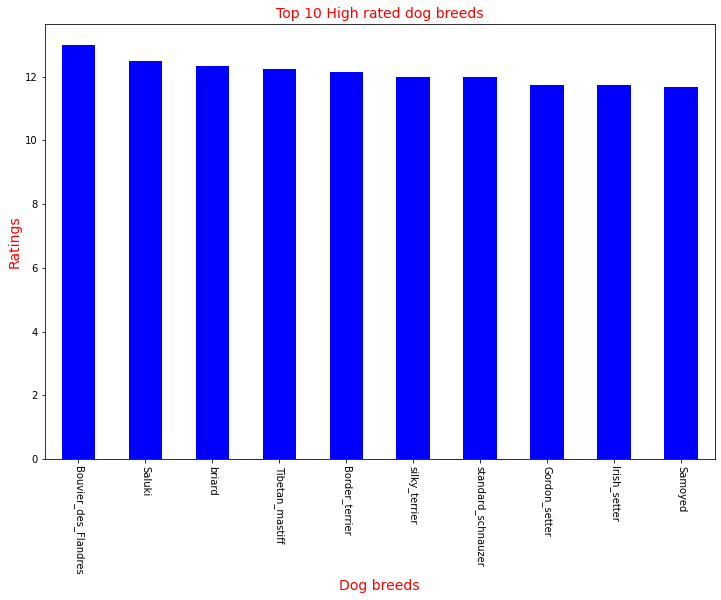

In [56]:
plt.figure(figsize = (12,8))
df.groupby('dog_breed')['rating_numerator'].mean().sort_values(ascending = False)[:10].plot(kind = 'bar', color = 'b')
plt.title('Top 10 High rated dog breeds', color = 'r', fontsize = 14)
plt.xlabel('Dog breeds', color = 'r', fontsize = 14)
plt.xticks(rotation = -90)
plt.ylabel('Ratings', color = 'r', fontsize = 14);

### Question 3: What are the top 10 least rated dog breeds?

In [57]:
df.groupby('dog_breed')['rating_numerator'].mean().sort_values()[:10]

dog_breed
Japanese_spaniel               5.000000
soft-coated_wheaten_terrier    8.166667
Walker_hound                   9.000000
Scotch_terrier                 9.000000
Tibetan_terrier                9.250000
Ibizan_hound                   9.250000
dalmatian                      9.333333
Boston_bull                    9.416667
Welsh_springer_spaniel         9.500000
Dandie_Dinmont                 9.571429
Name: rating_numerator, dtype: float64

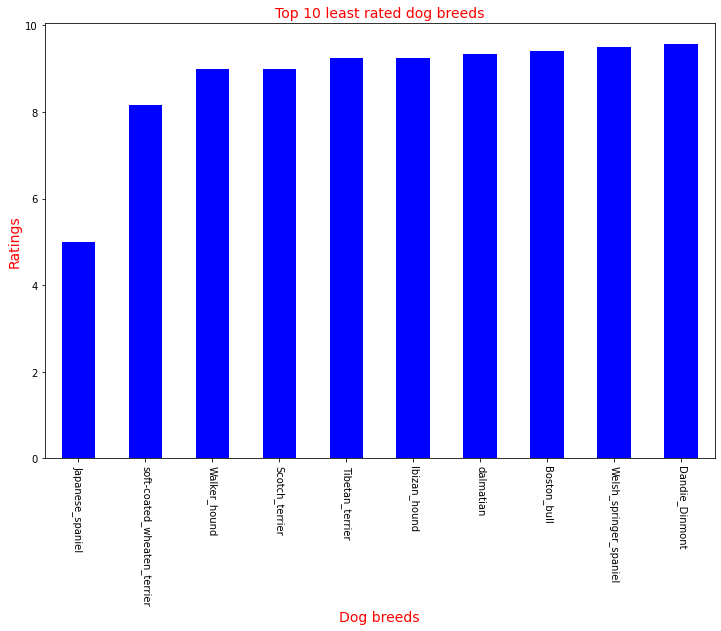

In [58]:
plt.figure(figsize = (12,8))
df.groupby('dog_breed')['rating_numerator'].mean().sort_values()[:10].plot(kind = 'bar', color = 'b')
plt.title('Top 10 least rated dog breeds', color = 'r', fontsize = 14)
plt.xlabel('Dog breeds', color = 'r', fontsize = 14)
plt.xticks(rotation = -90)
plt.ylabel('Ratings', color = 'r', fontsize = 14);

### Question 4: Which dog breeds are assessed more?

In [59]:
df.dog_breed.value_counts()[:10]

golden_retriever      153
Labrador_retriever    103
Pembroke               94
Chihuahua              89
pug                    62
toy_poodle             50
chow                   47
Samoyed                42
Pomeranian             40
malamute               33
Name: dog_breed, dtype: int64

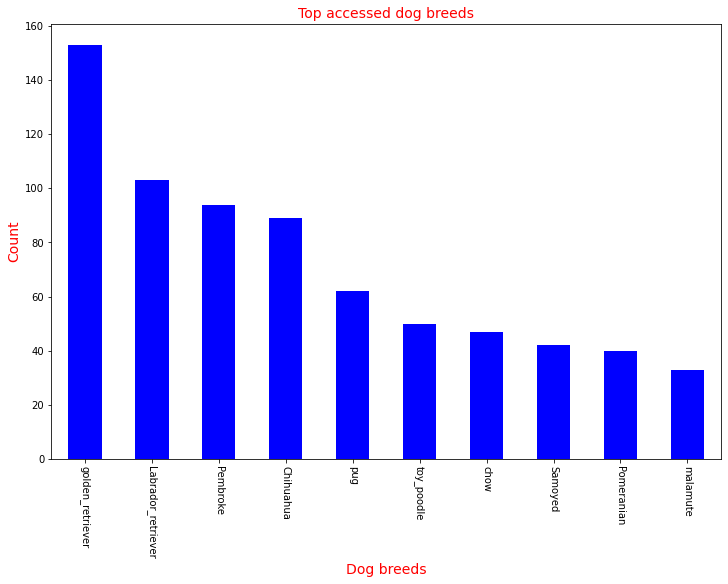

In [60]:
plt.figure(figsize = (12,8))
df.dog_breed.value_counts()[:10].plot(kind = 'bar', color ='b')
plt.title('Top accessed dog breeds', color = 'r', fontsize = 14)
plt.xlabel('Dog breeds', color = 'r', fontsize = 14)
plt.xticks(rotation = -90)
plt.ylabel('Count', color = 'r', fontsize = 14);

### Question 5: Which dog breeds' rating has the highest public engagement?

In [61]:
# public engagement is determined by both like_count and retweet_count
df['public_eng'] = df.like_count + df.retweet_count
df.groupby('dog_breed')['public_eng'].mean().sort_values(ascending = False)[:10]

dog_breed
Bedlington_terrier         26502.666667
Saluki                     23904.500000
Afghan_hound               19427.333333
Bouvier_des_Flandres       18879.000000
French_bulldog             18873.419355
black-and-tan_coonhound    17863.000000
flat-coated_retriever      17542.000000
English_springer           16482.600000
Leonberg                   15684.666667
whippet                    15263.636364
Name: public_eng, dtype: float64

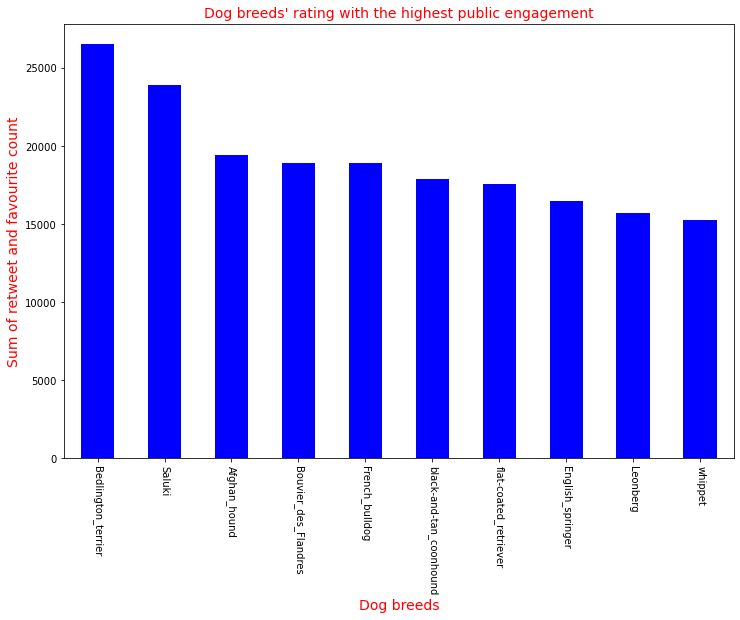

In [62]:
plt.figure(figsize = (12,8))
df.groupby('dog_breed')['public_eng'].mean().sort_values(ascending = False)[:10].plot(kind = 'bar', color = 'b')
plt.title("Dog breeds' rating with the highest public engagement", color = 'r', fontsize = 14)
plt.xlabel('Dog breeds', color = 'r', fontsize = 14)
plt.xticks(rotation = -90)
plt.ylabel('Sum of retweet and favourite count', color = 'r', fontsize = 14);

### Insights
1. 112 dog breeds were accessed by WeRateDogs

2. Bouvier des Flandres ranks first with average rating of 13.00 while Saluki ranks second

3. Japanese_spaniel ranks lowest with average rating of 5.0

4. Golden Retriever is the most accessed dog breed

5. Bedlington terrier's ratings has the highest public engagement with Saluki's ranking second